In [1]:
# Mandatorio al inicio de cada notebook
import os
import warnings
os.chdir(os.path.abspath(".."))
warnings.filterwarnings('ignore')

In [2]:
from src.pipeline import DataPipeline
from src.votaciones import votacion_promedio_simple
from src.feature_extractors import opensmile_features
import pandas as pd

Modulo _imprimir_detalles
model_version: v1
mapping: Ekman
cache: True
funcion_features: opensmile_features
funcion_votacion: votacion_promedio_simple
lag: 0
min_muestras: 400

---------------------------------------------------------
Ejecutando modulo crear_rangos_transcripciones
---------------------------------------------------------
Ejecutando modulo crear_objetivos
---------------------------------------------------------
Ejecutando modulo obtener_features
Se ha encontrado el dataset de features ya generado, cargando...
Dataset de features cargado con exito
---------------------------------------------------------
Ejecutando modulo acondicionar_dataset
---------------------------------------------------------
Ejecutando modulo remover_duplicados
Antes 73624
Despues 70255
---------------------------------------------------------
Ejecutando modulo crear_target_categorico
---------------------------------------------------------
Ejecutando modulo alinear_muestras
Distribucion pre al

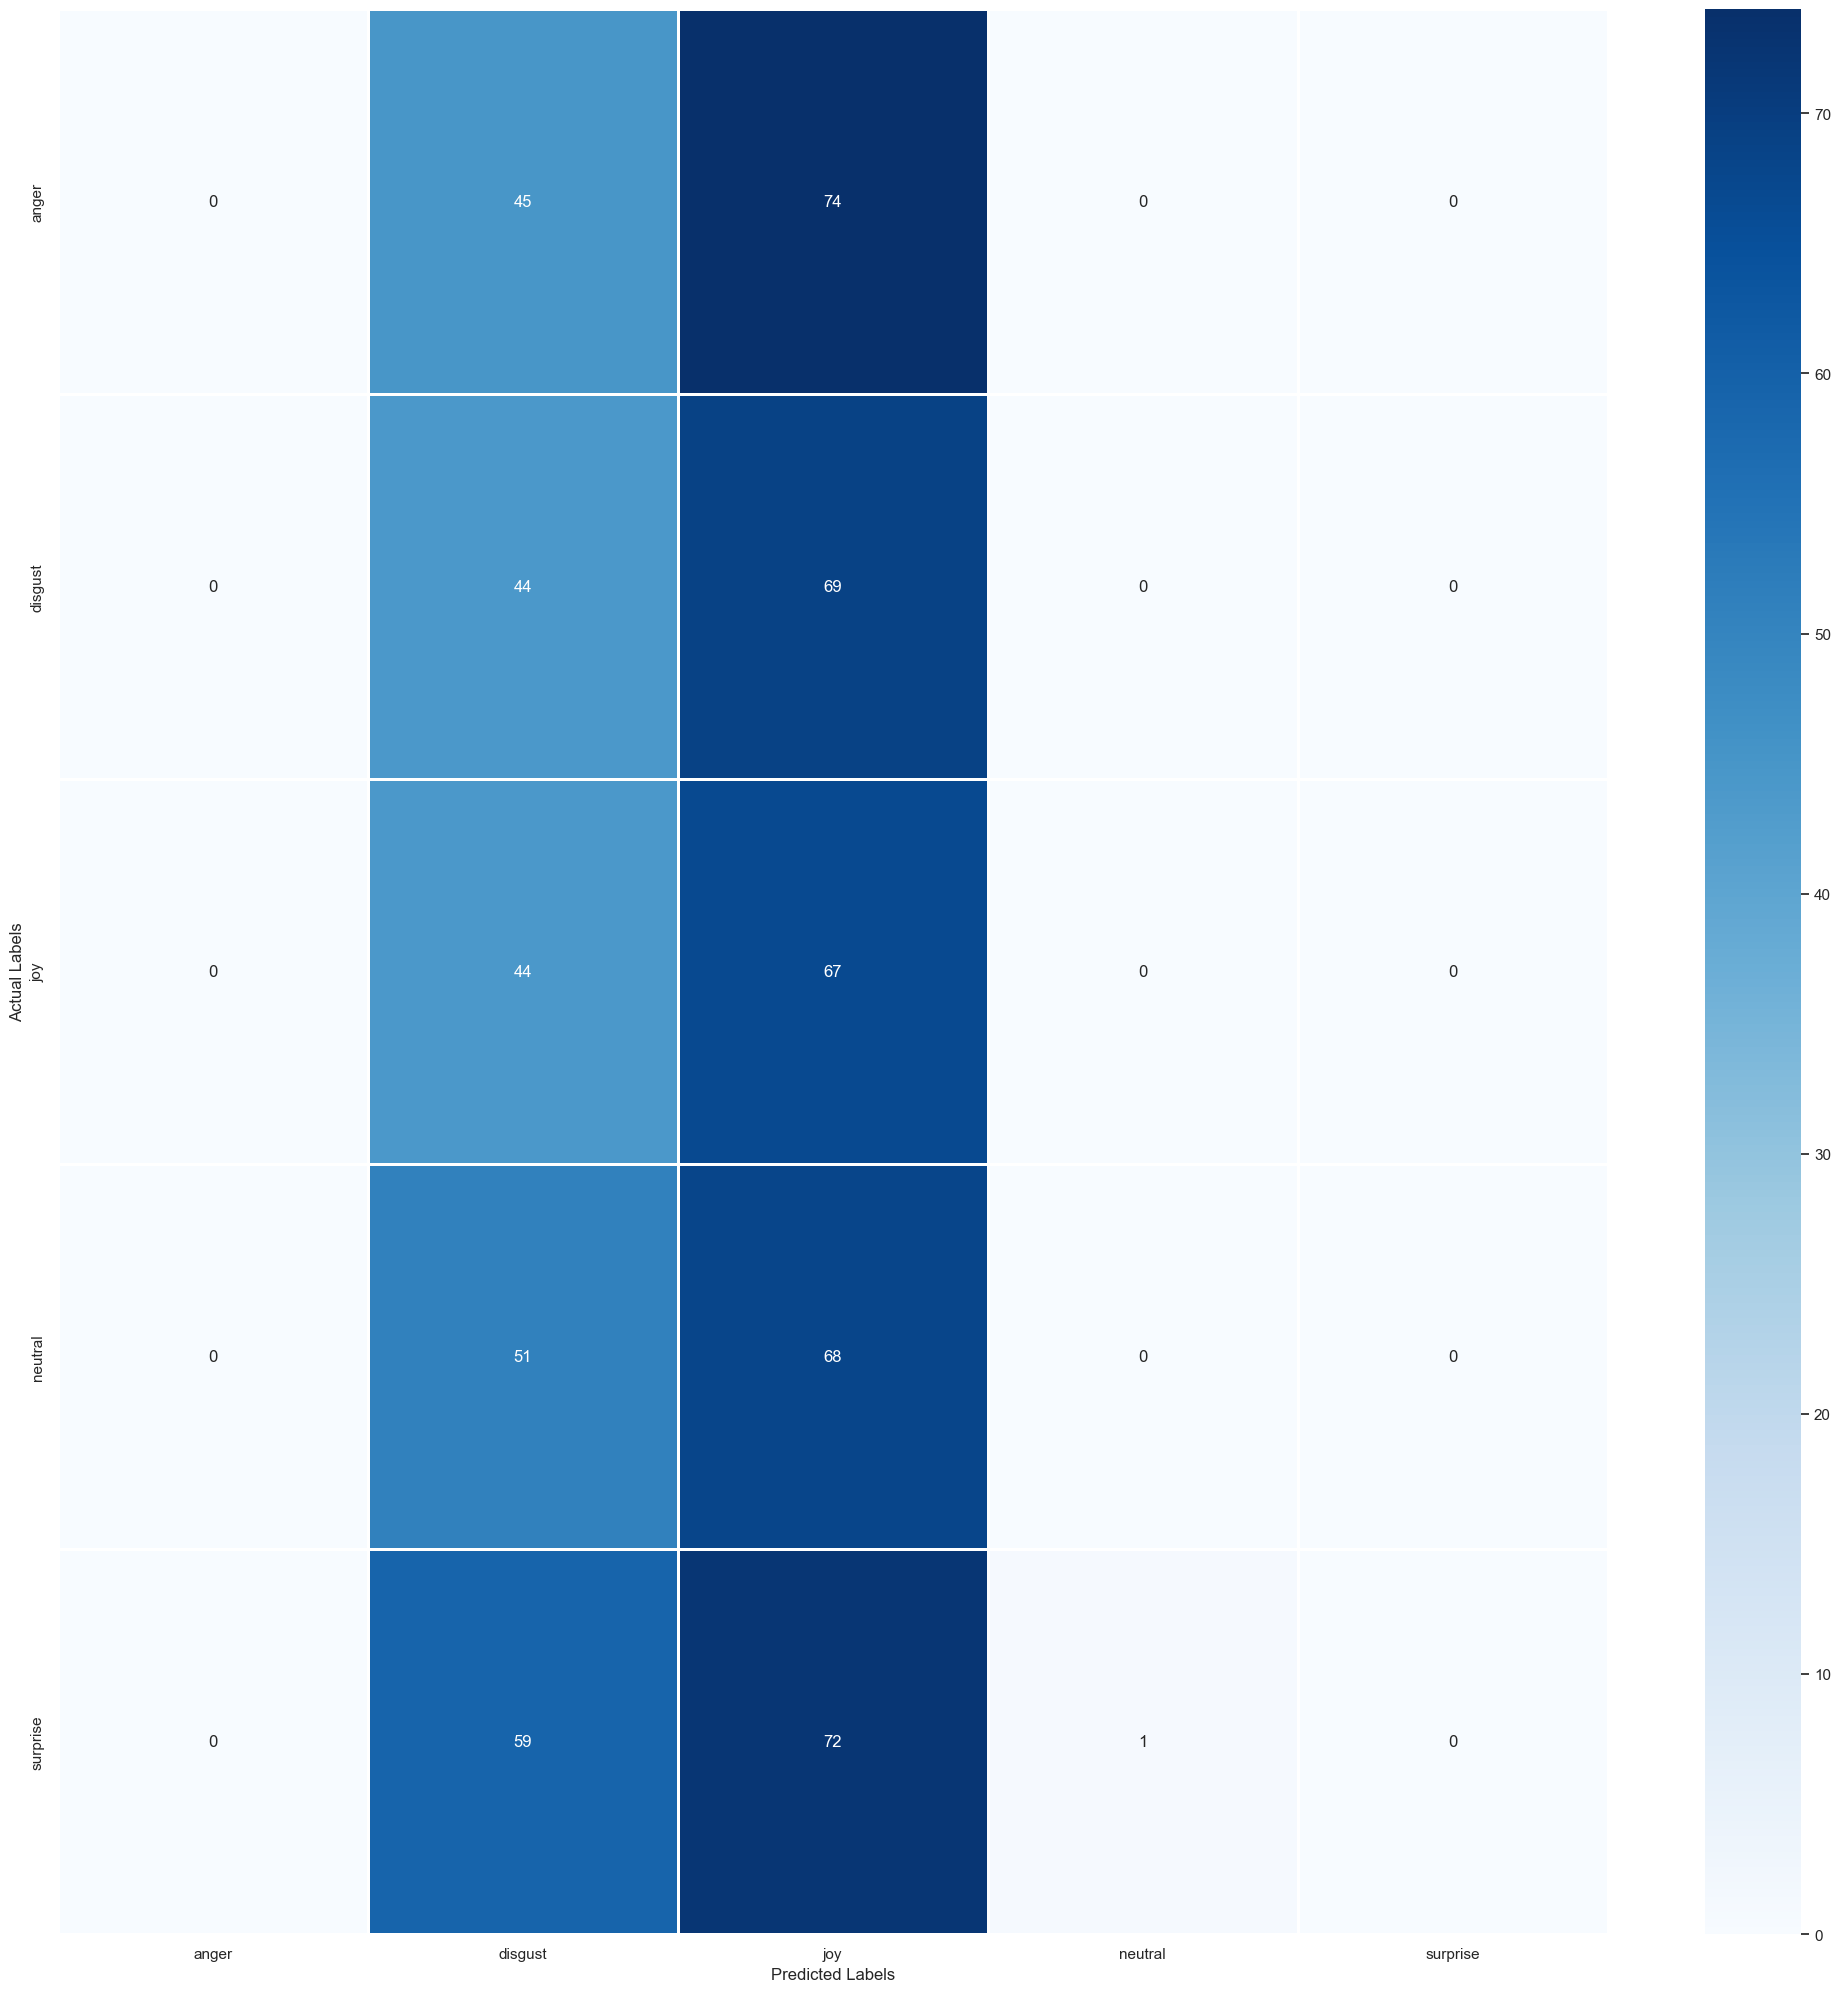

In [3]:
pipeline = DataPipeline('v1',
                        cache = True,
                        funcion_votacion = votacion_promedio_simple,
                        function_features = opensmile_features,
                        mapping = 'Ekman',
                        min_muestras = 400,
                        epochs = 1)

steps = [pipeline.crear_rangos_transcripciones,
        pipeline.crear_objetivos,
        pipeline.obtener_features,
        pipeline.acondicionar_dataset,
        pipeline.remover_duplicados,
        pipeline.crear_target_categorico,
        pipeline.alinear_muestras,
        pipeline.entrenar_keras_categorico,
        pipeline.guardar_modelo,
        pipeline.metricas_modelo_categorico]

pipeline.run_pipeline(steps)